# Crime Rates

Here, we are determining which neighborhood is the safest neighborhood to raise a child. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

We import the data and display the first ten rows.

In [3]:
data = pd.read_csv("PittsburghPoliceArrestData.csv")

# look at the first ten rows of the data
data.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Let's get a sum for each neighborhood of the amount of crimes that occured in them. Each row is one crime committed in a particular neighborhood. Therefore, if we count the number of rows that have a certain incident neighborhood, then we get the total crimes committed in that neighborhood. Then we can put the number of incidents and the neighborhoods they occured in (the index column) into a data frame.

In [4]:
data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = pd.DataFrame() 
crime["incidents"] = data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = crime.reset_index()
crime

,index,incidents
0,Central Business District,3312
1,South Side Flats,2840
2,Carrick,1957
3,East Allegheny,1770
4,Homewood South,1740
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


Let's plot this data!

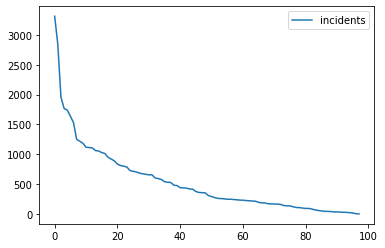

In [7]:

crime.plot()

Ew! The axis is hard to read! Let's make a bar graph instead of the original data!

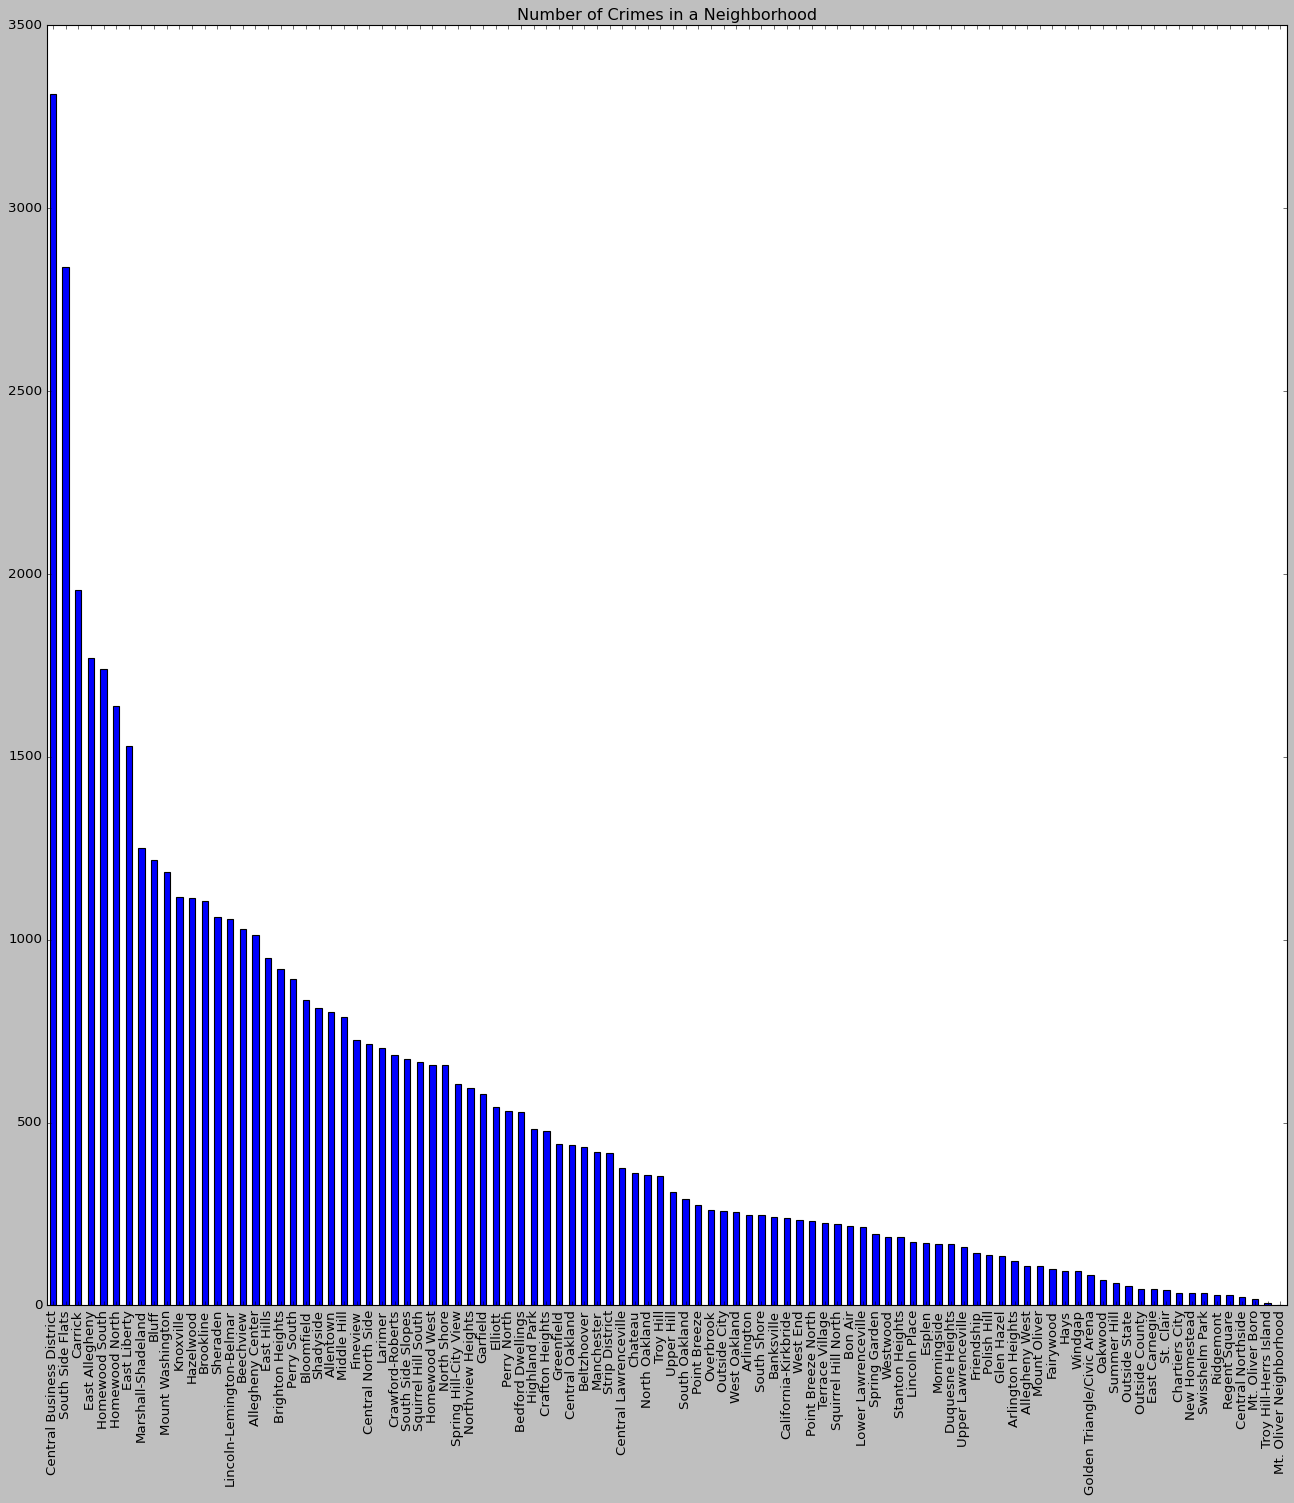

In [8]:
plt.style.use('classic')
data['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar(title='Number of Crimes in a Neighborhood', figsize=(20,20))

This is a headache inducing bar graph, but it is legable. The neighborhoods with the most crime recorded was the Central Business District, South Side Flats Carrick, East Allegheny and Homewood South.
Now, let's try plotting this on a map.

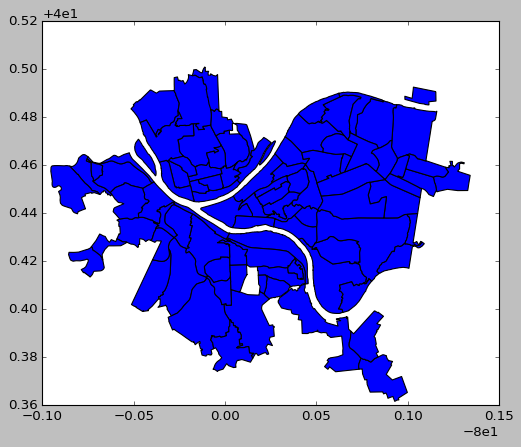

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() # plot the geopandas dataframe


In [10]:
# do the merge
hood = neighborhoods.merge(crime, how='left', left_on='hood', right_on="index")
# look at the head to confirm it merged correctly
hood = hood.dropna()
hood[['hood',"incidents",'geometry']].head()

,hood,incidents,geometry
0,Central Oakland,438.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,358.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,255.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,685.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,416.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


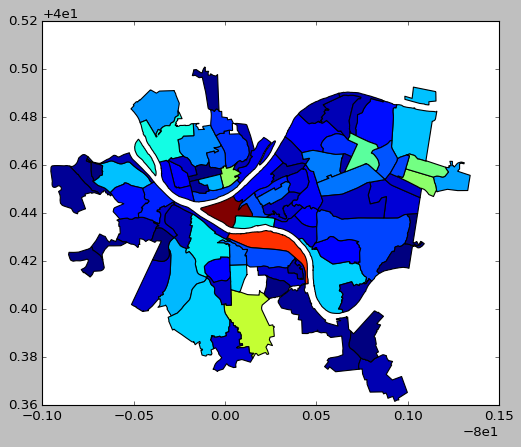

In [11]:
hood.plot(column="incidents")

We can improve this graph by adding a legend!

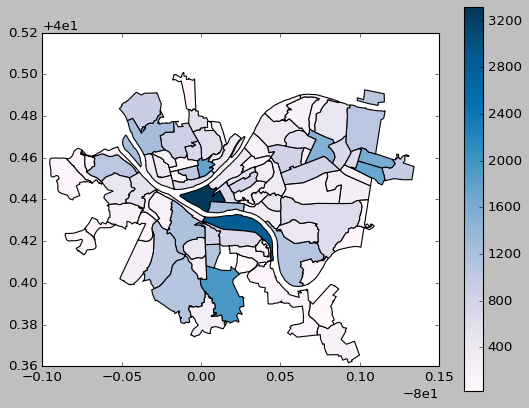

In [12]:
hood.plot(column='incidents', # set the data to be used for coloring
               cmap='PuBu', 
          legend= True# choose a color palette
 # set disctricts with no data to gray
               )